In [1]:
import pandas as pd


In [4]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df = df.drop(columns=["CustomerID"])


In [8]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
df["Gender"] = gender_encoder.fit_transform(df["Gender"])  # Male=1, Female=0


In [9]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
X.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [11]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # .inertia_ = sum of squared distances


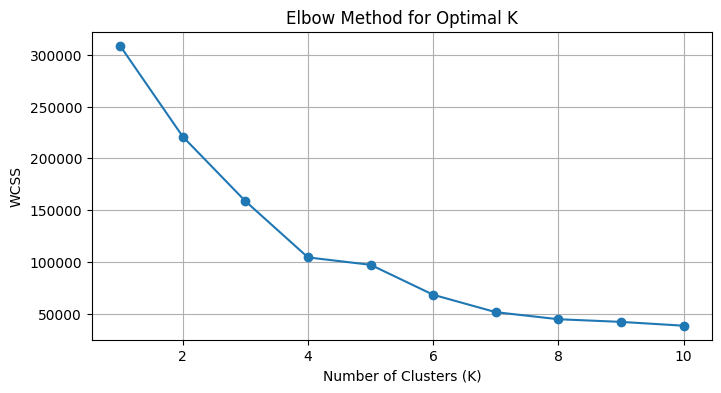

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [13]:
k = 4  # or 5 based on your elbow result
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)


In [14]:
df["Cluster"] = clusters
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0


In [15]:
df.groupby("Cluster").mean()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.378947,44.894737,48.705263,42.631579
1,0.461538,32.692308,86.538462,82.128205
2,0.500000,24.821429,28.714286,74.250000
3,0.526316,40.394737,87.000000,18.631579


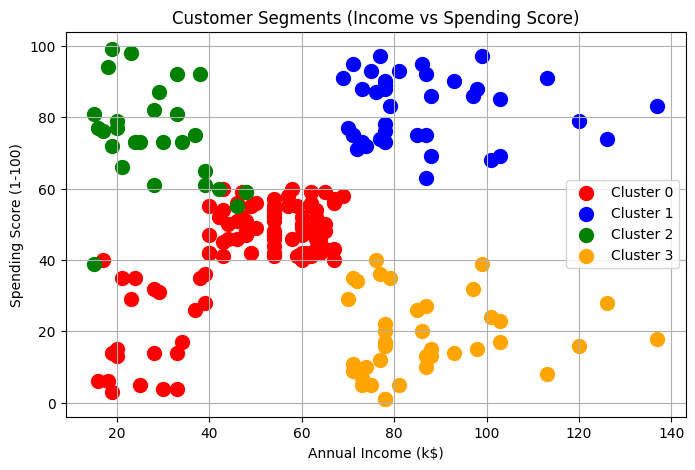

In [17]:
plt.figure(figsize=(8, 5))

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(k):
    plt.scatter(
        X.iloc[clusters == i]["Annual Income (k$)"],
        X.iloc[clusters == i]["Spending Score (1-100)"],
        s=100, c=colors[i], label=f"Cluster {i}"
    )

plt.title("Customer Segments (Income vs Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()
